# <a> Classificação de Dígitos Escritos à Mão com PyTorch Básico </a>

Vamos criar uma rede neural simples para criar um classificador para a famosa base de dados MNIST. Trata-se de imagens de dígitos escritos à mão onde é informada uma imagem e a rede deve dizer qual o número que está escrito.

Para criar o classificador vamos utilizar uma rede neural simples para mostrar como utilizar as principais classes e métodos do PyTorch na arquitetura e criação de redes neurais.

In [2]:
import numpy as np

# não diga!?
import torch

# Modulo de redes neurais e de otimizador (como atualizar os coeficientes?)
from torch import nn, optim

# datasets já possui o MNIST
# transforms para converter imagens para tensores (mas tem muitas outras aplicações para data augmentation)
from torchvision import datasets, transforms

# random_split para separarmos treino/validação
# dataloader para definir os batches (lembrando que dataset são os dados e loaders é como eles são organizados em batches)
from torch.utils.data import random_split, DataLoader

In [3]:
# Imagens do MNIST 28 * 28 pixels
dimensao_mnist = 28


# Sequential = pra quem tem preguiça de OO
# Linear = fully connected
# ReLU = rectified linear unit (nome chique pra: só passa positivo)

modelo_simprao_mas_honesto = nn.Sequential(
    nn.Linear(dimensao_mnist * dimensao_mnist, 128),
    nn.ReLU(), # funcao relu
    nn.Linear(128,128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [4]:
modelo_simprao_mas_honesto

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
)

In [5]:
# SGD - stochastic gradient descent
otimizador = optim.SGD(modelo_simprao_mas_honesto.parameters(), lr=1e-2, momentum=0.9)

In [6]:
# Erro/Loss
funcao_erro = nn.CrossEntropyLoss()

In [7]:
# Baixar e transformar os dados em tensores PyTorch
dados = datasets.MNIST('data', train=True, download=False, transform=transforms.ToTensor())

In [14]:
type(dados)

torchvision.datasets.mnist.MNIST

In [8]:
dados.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [9]:
dados.data.size()

torch.Size([60000, 28, 28])

In [10]:
dados.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [11]:
dados.targets[0]

tensor(5)

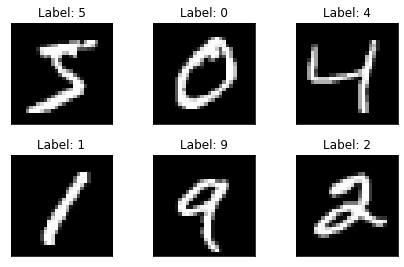

In [12]:
# https://nextjournal.com/gkoehler/pytorch-mnist
from matplotlib import pyplot as plt

fig = plt.figure()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(dados.data[i], cmap='gray', interpolation='none')
    plt.title("Label: {}".format(dados.targets[i]))
    plt.xticks([])
    plt.yticks([])

In [13]:
# Split de treino e validação (na vida real, treino, valid e teste hein, galera!!)
treino, validacao = random_split(dados, [55000, 5000])

In [15]:
# Base de dados tá pronta! Mas vamos criar os batches pra atualizar
# os coeficientes a cada batch (ao invés de atualizar imagem por imagem)
loader_treino = DataLoader(treino, batch_size=32)
loader_validacao = DataLoader(validacao, batch_size=32)

In [16]:
# Numero de épocas (cada passagem pelo conjunto de treino)
epocas = 10

In [17]:
# Passa por todos os datapoints de treino
for epoca in range(epocas):
    acertos_treino = 0
    acertos_validacao = 0

    # TREINO
    # Vamos iterar por cada batch (ou seja, de 32 em 32)
    for batch in loader_treino:
        # x é o tensor da imagem do dígito
        # y é o label, ou seja, esse garrancho que o cara/mina escreveu
        # é que número??
        x, y_real = batch
        
        # b é a quantidade de imagens no batch
        b = x.size(0)
        
        # view é o "reshape" do tensor, aqui estamos criando
        # 32 linhas de 784 colunas (cada linha 1 imagem do batch)
        x = x.view(b, -1) # tipo o reshape do numpy
        
        # forward pass
        y_previsto = modelo_simprao_mas_honesto(x)
        
        # calcular o erro (funcao de perda/loss)
        erro = funcao_erro(y_previsto, y_real)
        
        # Calcular as predições corretas
        # y_previsto tem 32 linhas com 10 posições cada
        # torch max busca os maiores valores de cada array na dimensão informada
        # max[0] traz os máximos, max[1] os argmax, que, no nosso caso, é o dígito de 
        # maior probabilidade
        predicoes = torch.max(y_previsto.data, 1)[1]
        
        acertos_batch = (predicoes == y_real).sum()
        acertos_treino += acertos_batch
        
        # limpar os gradientes, do contrário ele acumula!
        # como queremos atualizar os coeficientes por batch, temos que zerar os gradientes
        modelo_simprao_mas_honesto.zero_grad()
        
        # Lembra do Autograd??? Vamos calcular as derivadas parciais (início do backpropagation)
        erro.backward()
        
        # atualizar os coeficientes a partir do otimizador
        otimizador.step()
        
    # VALIDACAO
    # Agora é a hora de calcular o erro na validação!
    # Como a gente não quer atualizar os gradientes (só fazer a previsão do modelo treinado)
    # vamos desligar o autograd
    with torch.no_grad():
        for batch in loader_validacao:
            x, y_real = batch
            
            b = x.size(0)
            x = x.view(b, -1)
            
            # forward pass: mais conhecido como predição do modelo treinado
            y_previsto = modelo_simprao_mas_honesto(x)
            
            # Calcular as predições corretas na validação
            predicoes = torch.max(y_previsto.data, 1)[1] # previsão com maior probabilidade
            acertos_batch = (predicoes == y_real).sum()
            acertos_validacao += acertos_batch
    
    print(f'Ep: {epoca + 1}, Erro treino: {erro.item():.2f}, Acc treino: {acertos_treino/len(treino):.2f}, Acc valid: {acertos_validacao/len(validacao):.2f}')

Ep: 1, Erro treino: 0.17, Acc treino: 0.88, Acc valid: 0.94
Ep: 2, Erro treino: 0.13, Acc treino: 0.96, Acc valid: 0.95
Ep: 3, Erro treino: 0.09, Acc treino: 0.97, Acc valid: 0.96
Ep: 4, Erro treino: 0.05, Acc treino: 0.98, Acc valid: 0.96
Ep: 5, Erro treino: 0.04, Acc treino: 0.98, Acc valid: 0.96
Ep: 6, Erro treino: 0.03, Acc treino: 0.99, Acc valid: 0.97
Ep: 7, Erro treino: 0.03, Acc treino: 0.99, Acc valid: 0.97
Ep: 8, Erro treino: 0.01, Acc treino: 0.99, Acc valid: 0.97
Ep: 9, Erro treino: 0.01, Acc treino: 0.99, Acc valid: 0.97
Ep: 10, Erro treino: 0.01, Acc treino: 1.00, Acc valid: 0.97


In [18]:
validacao[2][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [19]:
validacao[2][1]

0

In [20]:
b = validacao[2][0].size(0)
x = validacao[2][0].view(b, -1)
resultado = modelo_simprao_mas_honesto(x)
resultado.argmax()

tensor(0)

In [ ]:
validacao[2][0].size(0)

In [ ]:
validacao[2][0].size(1), validacao[2][0].size(2)

In [ ]:
dados.classes

In [21]:
#LABELS = dados.classes

def predizer_garrancho(garrancho):
    # a imagem vem em 2 dimensoes, mas o modelo requer 3
    # /255 pra normalizar os valores dos pixels
    garrancho = garrancho.reshape(-1, 28, 28) / 255.
    
    # Tranformando numpy em torch
    x = torch.tensor(garrancho, dtype=torch.float32)
    
    b = x.size(0)
    x = x.view(b, -1)
    
    with torch.no_grad():
        out = modelo_simprao_mas_honesto(x)
    
    return out.argmax()



In [22]:
import gradio as gr

gr.Interface(fn=predizer_garrancho, 
             inputs="sketchpad",
             outputs="textbox",
             live=True).launch(share=True)

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://26584.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x21f32be1b08>,
 'http://127.0.0.1:7860/',
 'https://26584.gradio.app')

In [ ]:
# Como seria nosso mesmo modelo usando o nn.Module??

class ModeloOO(nn.Module):
    def __init__(self, input_size=28**2, output_size=10, layers=[128,128]):
        super().__init__()
        self.l1 = nn.Linear(input_size, layers[0])
        self.l2 = nn.Linear(layers[0], layers[1])
        self.l3 = nn.Linear(layers[1], output_size)

    def forward(self, X):
        X = nn.functional.relu(self.l1(X))
        X = nn.functional.relu(self.l2(X))
        X = self.l3(X)
        
        return nn.functional.log_softmax(X, dim=1)


model = ModeloOO()
print(model)